In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

In [2]:
df=pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print(df.shape)
print(df.duplicated().sum())

(8950, 18)
0


In [3]:
df.drop(columns=['CUST_ID'],inplace=True)
df.dropna(subset=['CREDIT_LIMIT'],inplace=True)
df.dropna(subset=['MINIMUM_PAYMENTS'],inplace=True)

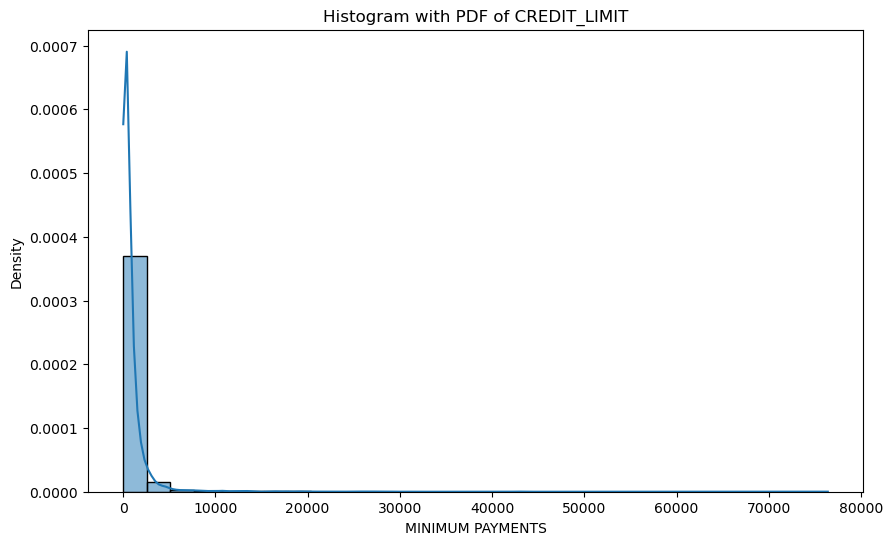

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['MINIMUM_PAYMENTS'], bins=30, kde=True, stat="density")
plt.title('Histogram with PDF of CREDIT_LIMIT')
plt.xlabel('MINIMUM PAYMENTS')
plt.ylabel('Density')
plt.show()

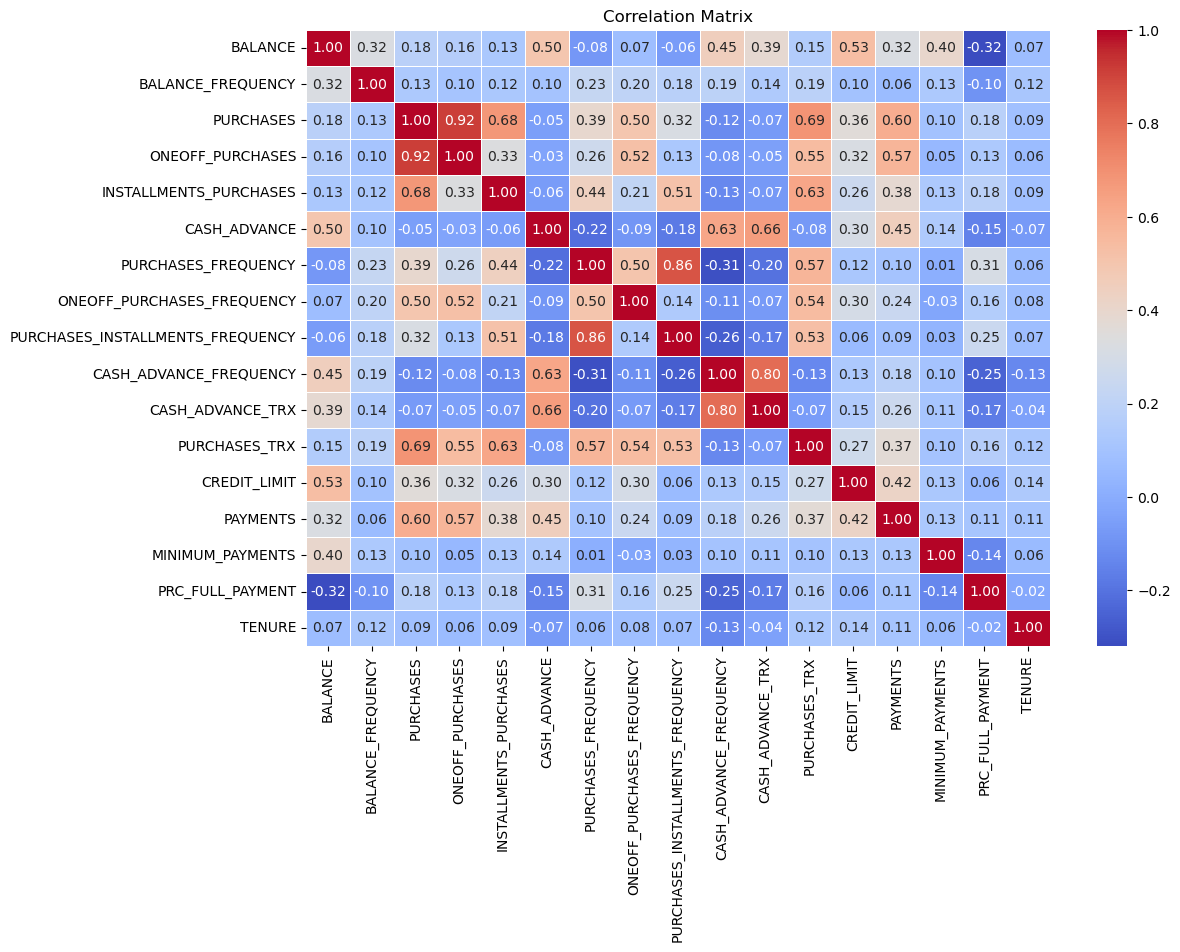

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

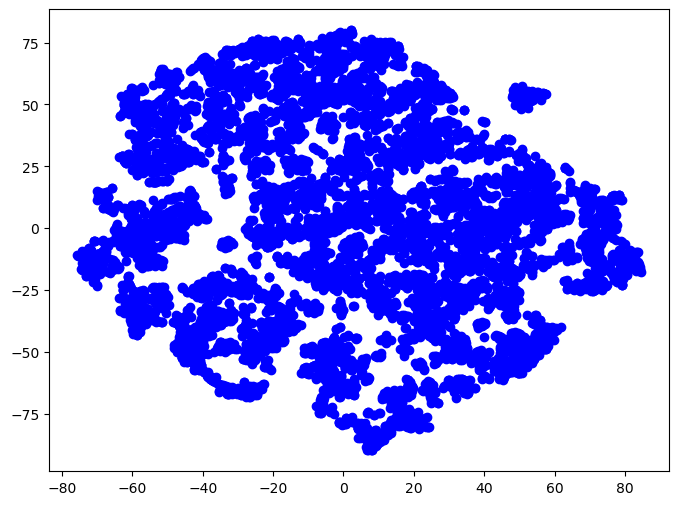

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue')
plt.show()

In [4]:
df = df.astype(float)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

<ipython-input-50-db93c1e2efaa>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')
<ipython-input-50-db93c1e2efaa>:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, silhouette_scores, 'go-', marker='o')


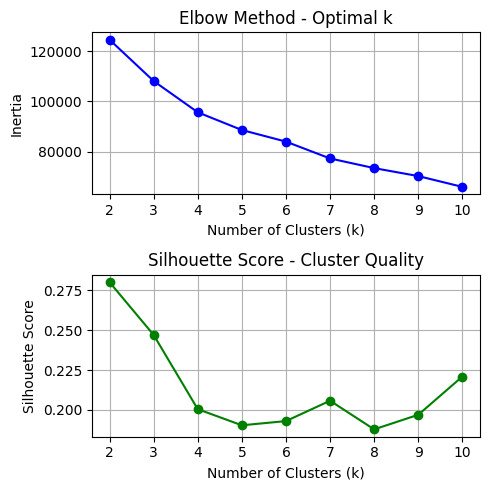

In [ ]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(5, 5))

plt.subplot(2, 1, 1)
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal k')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(K, silhouette_scores, 'go-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Cluster Quality')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

print(kmeans.inertia_)
print("silhouette_score",silhouette_score(df, kmeans.labels_))

108086.49495605758
silhouette_score 0.3376540935013341


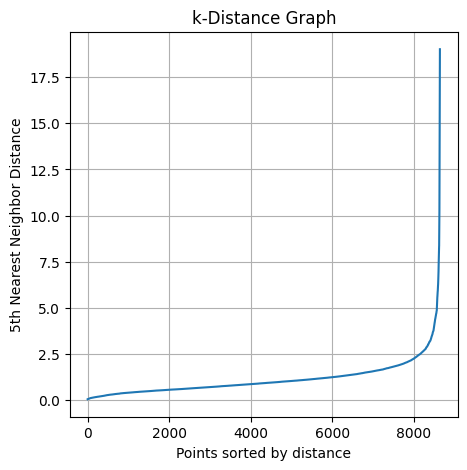

In [ ]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

k_distances = np.sort(distances[:, min_samples - 1])

plt.figure(figsize=(5, 5))
plt.plot(k_distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [ ]:
best_score = -1
n_samples = None

for min_samples in range(3, 10):
    db = DBSCAN(eps=2.5, min_samples=min_samples)
    labels = db.fit_predict(df_scaled)

    if len(set(labels)) <= 1 or -1 in set(labels) and len(set(labels)) == 2:
        continue

    score = silhouette_score(df_scaled, labels)
    if score > best_score:
        best_score = score
        n_samples = min_samples

print("Best DBSCAN n_samples:", n_samples)
print("Best silhouette score:", best_score)

Best DBSCAN n_samples: 4
Best silhouette score: 0.476630327143759


In [ ]:
dbscan = DBSCAN(eps=2.5, min_samples=4)
labels = dbscan.fit_predict(df_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)
score = silhouette_score(df_scaled, labels)
print("Silhouette Score:", score)

Number of clusters found (excluding noise): 4
Silhouette Score: 0.476630327143759


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)
dbscan = DBSCAN(eps=2.5, min_samples=4)
df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_cluster,dbscan_cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,1,0


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

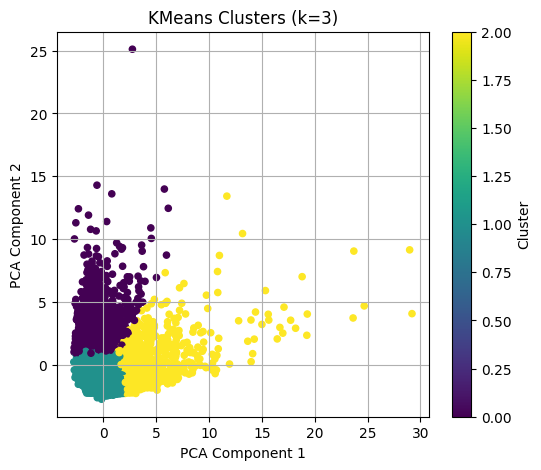

In [ ]:
plt.figure(figsize=(6, 5))
plt.title("KMeans Clusters (k=3)")
plt.scatter(df['pca1'], df['pca2'], c=df['kmeans_cluster'], cmap='viridis', s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

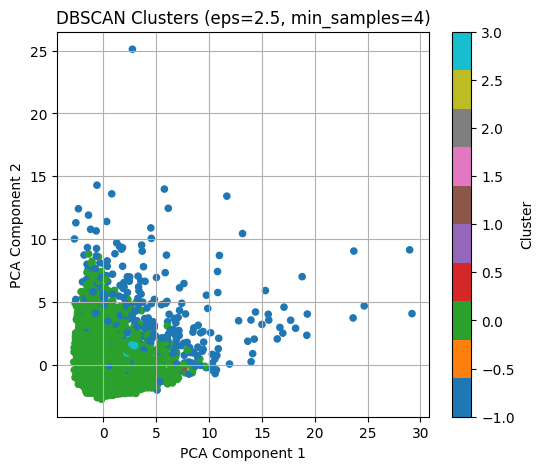

In [ ]:
plt.figure(figsize=(6, 5))
plt.title("DBSCAN Clusters (eps=2.5, min_samples=4)")
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='tab10', s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


#--------------------------------------------------------------------------------

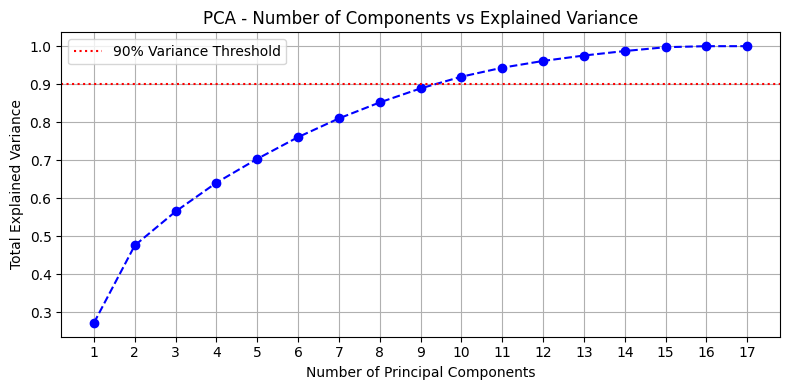

In [ ]:
explained_variance = []
n_features = df_scaled.shape[1]

for n in range(1, n_features + 1):
    pca = PCA(n_components=n)
    pca.fit(df_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

# Step 3: Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_features + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('PCA - Number of Components vs Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Explained Variance')
plt.grid(True)
plt.xticks(range(1, n_features + 1))
plt.axhline(y=0.9, color='r', linestyle=':', label='90% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
pca = PCA(n_components=9)
df_scaled_with_PCA = pca.fit_transform(df_scaled)

<ipython-input-125-340af44c9b81>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')
<ipython-input-125-340af44c9b81>:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, silhouette_scores, 'go-', marker='o')


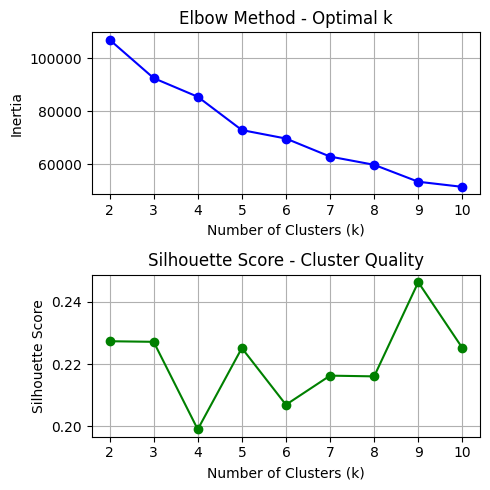

In [ ]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_with_PCA)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled_with_PCA, kmeans.labels_))

plt.figure(figsize=(5, 5))

plt.subplot(2, 1, 1)
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal k')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(K, silhouette_scores, 'go-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Cluster Quality')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled_with_PCA)

print(kmeans.inertia_)
print("silhouette_score",silhouette_score(df_scaled_with_PCA, kmeans.labels_))

92550.34493296049
silhouette_score 0.22714408439132927


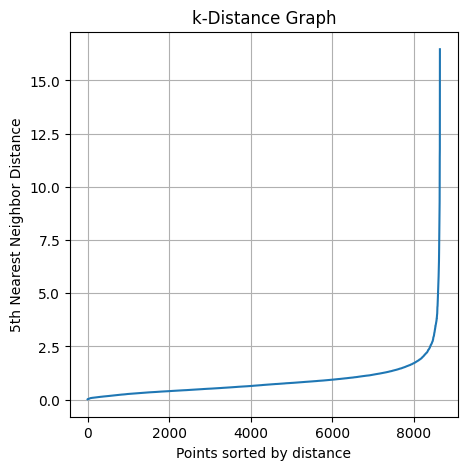

In [ ]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled_with_PCA)
distances, indices = neighbors_fit.kneighbors(df_scaled_with_PCA)

k_distances = np.sort(distances[:, min_samples - 1])

plt.figure(figsize=(5, 5))
plt.plot(k_distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [ ]:
best_score = -1
n_samples = None

for min_samples in range(3, 10):
    db = DBSCAN(eps=2.5, min_samples=min_samples)
    labels = db.fit_predict(df_scaled_with_PCA)

    if len(set(labels)) <= 1 or -1 in set(labels) and len(set(labels)) == 2:
        continue

    score = silhouette_score(df_scaled_with_PCA, labels)
    if score > best_score:
        best_score = score
        n_samples = min_samples

print("Best DBSCAN n_samples:", n_samples)
print("Best silhouette score:", best_score)


Best DBSCAN n_samples: 4
Best silhouette score: 0.4682691743005232


In [6]:
dbscan = DBSCAN(eps=2.2, min_samples=4)
labels = dbscan.fit_predict(df_scaled_with_PCA)
n_clusters = len(set(labels))
print("Number of clusters found (excluding noise):", n_clusters)
score = silhouette_score(df_scaled_with_PCA, labels)
print("Silhouette Score:", score)

Number of clusters found (excluding noise): 3
Silhouette Score: 0.6019998959869169


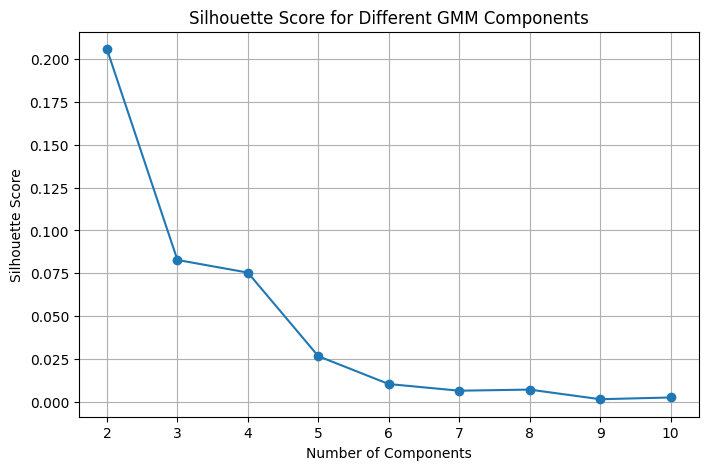

In [ ]:
scores = []
components_range = range(2, 11)

for n in components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(components_range, scores, marker='o')
plt.title("Silhouette Score for Different GMM Components")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df)

gmm_silhouette = silhouette_score(df, gmm_labels)

print("Silhouette Score:", gmm_silhouette)

Silhouette Score: 0.07539082924851531


In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster_with_PCA'] = kmeans.fit_predict(df_scaled_with_PCA)
dbscan = DBSCAN(eps=2.2, min_samples=4)
df['dbscan_cluster_with_PCA'] = dbscan.fit_predict(df_scaled_with_PCA)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_cluster_with_PCA,dbscan_cluster_with_PCA
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,1,0


In [9]:
pca_2d = PCA(n_components=2).fit_transform(df_scaled)
df['pca1'] = pca_2d[:, 0]
df['pca2'] = pca_2d[:, 1]

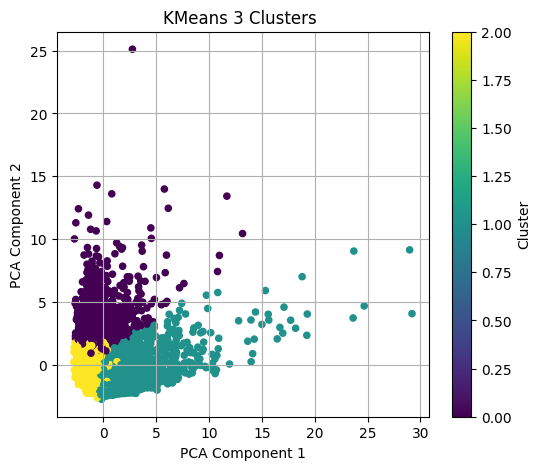

In [10]:
plt.figure(figsize=(6, 5))
plt.title("KMeans 3 Clusters ")
plt.scatter(df['pca1'], df['pca2'], c=df['kmeans_cluster_with_PCA'], cmap='viridis', s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

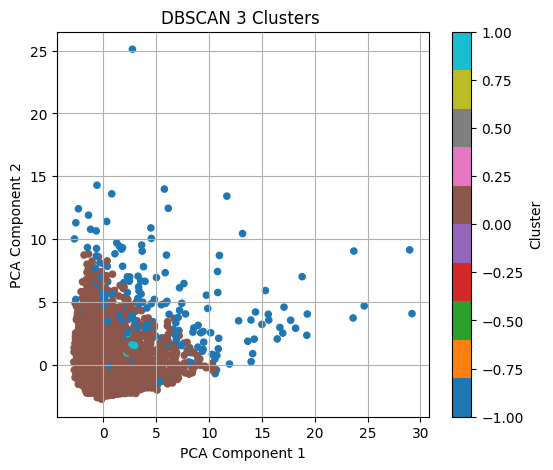

In [11]:
plt.figure(figsize=(6, 5))
plt.title("DBSCAN 3 Clusters ")
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster_with_PCA'], cmap='tab10', s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [12]:
cluster_summary = df.groupby('kmeans_cluster_with_PCA')[[
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]].mean().round(2)

cluster_summary


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PAYMENTS,MINIMUM_PAYMENTS
kmeans_cluster_with_PCA,,,,,,,
0,4628.25,594.73,371.47,223.34,4657.45,3749.71,2117.05
1,1294.29,2206.96,1253.13,954.22,235.64,2197.26,796.38
2,1015.43,308.11,210.59,97.83,557.63,973.48,580.28


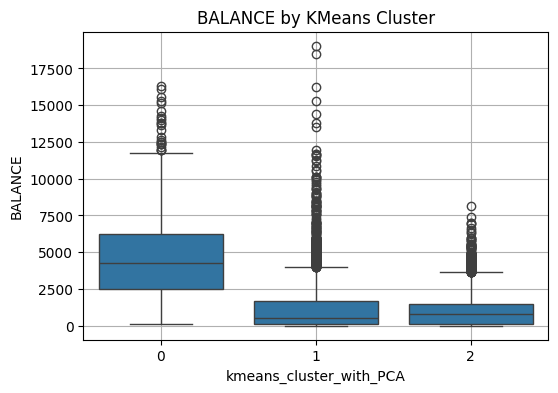

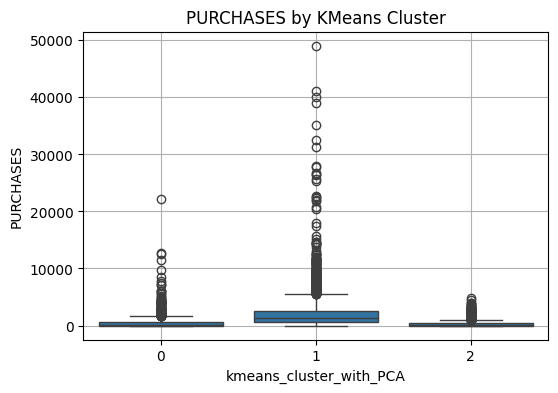

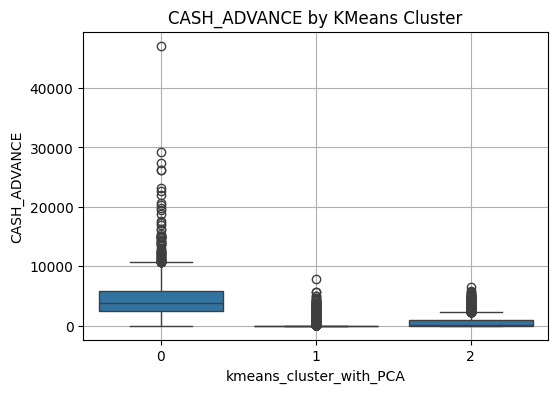

In [ ]:
for feature in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='kmeans_cluster_with_PCA', y=feature, data=df)
    plt.title(f'{feature} by KMeans Cluster')
    plt.grid(True)
    plt.show()

In [13]:
dbscan_summary = df.groupby('dbscan_cluster_with_PCA')[[
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]].mean().round(2)

dbscan_summary


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PAYMENTS,MINIMUM_PAYMENTS
dbscan_cluster_with_PCA,,,,,,,
-1,5582.92,7267.66,4647.09,2623.45,4942.29,11720.08,5942.92
0,1501.13,871.10,505.35,365.99,897.18,1539.38,723.10
1,4582.22,1345.66,146.93,1198.73,154.85,1360.39,27475.79


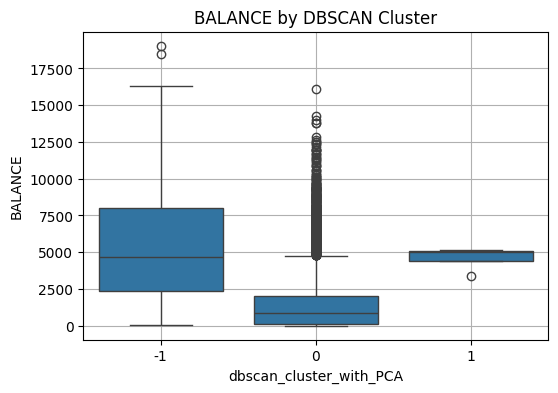

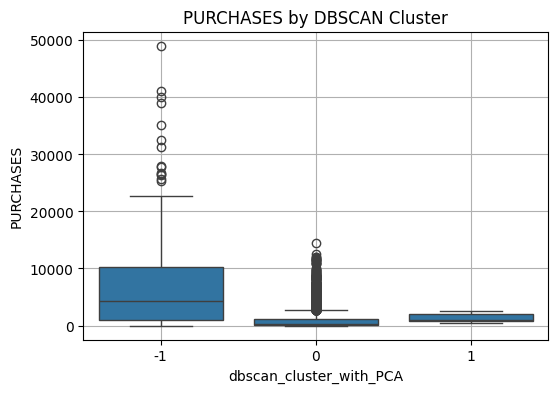

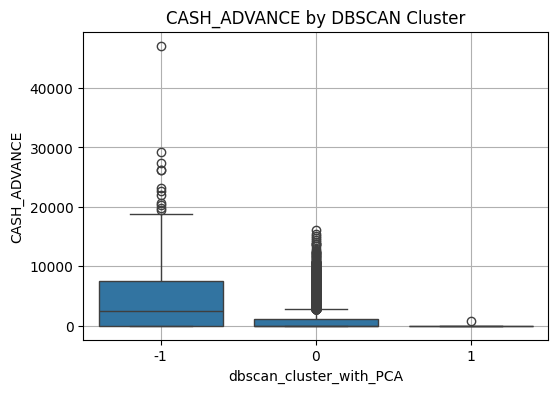

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='dbscan_cluster_with_PCA', y=feature, data=df)
    plt.title(f'{feature} by DBSCAN Cluster')
    plt.grid(True)
    plt.show()


#Conclusion
#KMeans
##Cluster 0 : High Balance, High Cash Advance, Low Purchases
###They frequently use cash advances, or need for immediate cash, they make fewer purchases.

##Cluster 1 : Low Balance, High Purchases, Low Cash Advance
###low credit balances, These customers are the most active spenders, making regular and substantial purchases, use cash advances.

##Cluster 2 : Low Balance, Low Purchases, Low Cash Advance
###These users maintain low balances, and they rarely use the card for either purchases or cash withdrawals.

#DBSCAN

##Cluster -1 (Noise/Outliers) : Irregular or Extreme Behavior
###These customers do not fit into the main clusters and may represent outliers. Their spending patterns are inconsistent—some may have unusually high or low balances, purchases, or cash advances.

##Cluster 0 : Moderate Balance, Low Purchases, High Cash Advance
###These customers maintain moderate credit balances but rely heavily on cash advances. They make fewer purchases, suggesting a preference for liquidity over regular spending.

##Cluster 1 : Low Balance, High Purchases, Low Cash Advance
###These are active spenders with low balances. They frequently make purchases but rarely use cash advances, indicating a reliance on credit for transactions rather than cash withdrawals.